In [1]:
import pandas as pd
import numpy as np

In [2]:
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")

In [3]:
print("Train data shape",train.shape)
print("test data shape",test.shape)

Train data shape (1460, 81)
test data shape (1459, 80)


In [4]:
train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [5]:
import matplotlib.pyplot as plt
plt.style.use(style='ggplot')
plt.rcParams['figure.figsize'] = (10, 6)

In [6]:
train.SalePrice.describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

Skew is: 1.88287575977


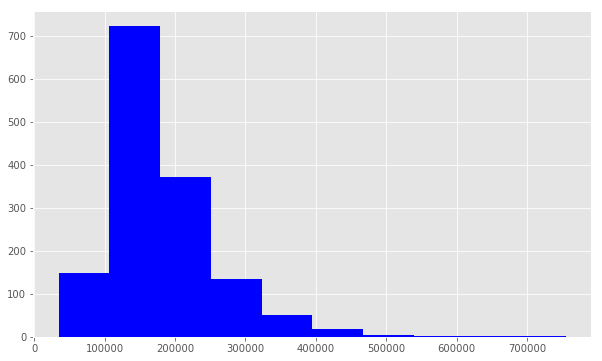

In [7]:
print ("Skew is:", train.SalePrice.skew())
plt.hist(train.SalePrice, color='blue')
plt.show()

Skew is: 0.121335062205


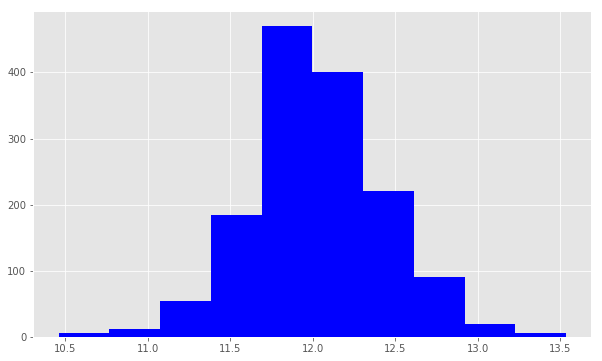

In [8]:
target = np.log(train.SalePrice)
print ("Skew is:", target.skew())
plt.hist(target, color='blue')
plt.show()

In [9]:
#checking numeric features
numeric_features=train.select_dtypes(include=[np.number])
numeric_features.dtypes

Id                 int64
MSSubClass         int64
LotFrontage      float64
LotArea            int64
OverallQual        int64
OverallCond        int64
YearBuilt          int64
YearRemodAdd       int64
MasVnrArea       float64
BsmtFinSF1         int64
BsmtFinSF2         int64
BsmtUnfSF          int64
TotalBsmtSF        int64
1stFlrSF           int64
2ndFlrSF           int64
LowQualFinSF       int64
GrLivArea          int64
BsmtFullBath       int64
BsmtHalfBath       int64
FullBath           int64
HalfBath           int64
BedroomAbvGr       int64
KitchenAbvGr       int64
TotRmsAbvGrd       int64
Fireplaces         int64
GarageYrBlt      float64
GarageCars         int64
GarageArea         int64
WoodDeckSF         int64
OpenPorchSF        int64
EnclosedPorch      int64
3SsnPorch          int64
ScreenPorch        int64
PoolArea           int64
MiscVal            int64
MoSold             int64
YrSold             int64
SalePrice          int64
dtype: object

In [11]:
corr = numeric_features.corr()

print(corr["SalePrice"].sort_values(ascending=False)[:5],"\n")
print(corr["SalePrice"].sort_values(ascending=False)[-5:])

SalePrice      1.000000
OverallQual    0.790982
GrLivArea      0.708624
GarageCars     0.640409
GarageArea     0.623431
Name: SalePrice, dtype: float64 

YrSold          -0.028923
OverallCond     -0.077856
MSSubClass      -0.084284
EnclosedPorch   -0.128578
KitchenAbvGr    -0.135907
Name: SalePrice, dtype: float64


In [12]:
train.OverallQual.unique()

array([ 7,  6,  8,  5,  9,  4, 10,  3,  1,  2], dtype=int64)

In [13]:
quality_pivot = train.pivot_table(index='OverallQual',
                                 values='SalePrice',aggfunc=np.mean)

In [14]:
quality_pivot

OverallQual
1      50150
2      51770
3      87473
4     108420
5     133523
6     161603
7     207716
8     274735
9     367513
10    438588
Name: SalePrice, dtype: int64

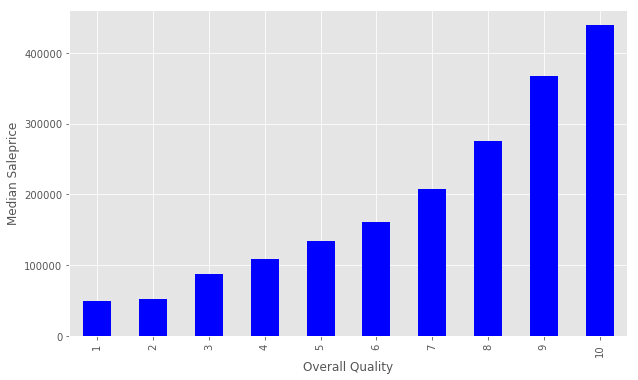

In [15]:
quality_pivot.plot(kind='bar', color='blue')
plt.xlabel('Overall Quality')
plt.ylabel('Median Saleprice')
plt.show()

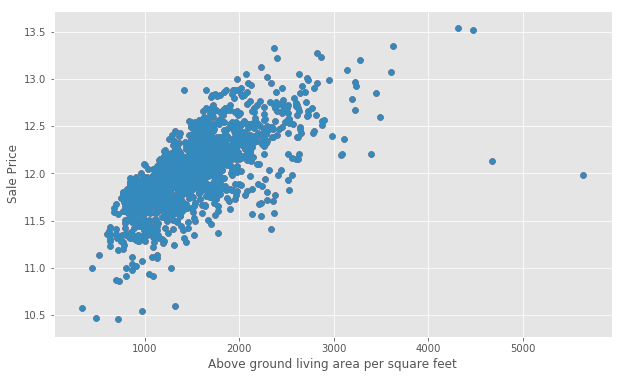

In [17]:
plt.scatter(x=train['GrLivArea'],y=target)
plt.xlabel('Above ground living area per square feet')
plt.ylabel('Sale Price')
plt.show()

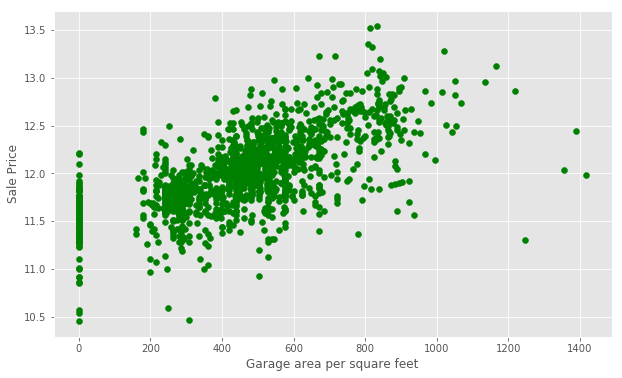

In [19]:
plt.scatter(x=train['GarageArea'],y=target,color='green')
plt.xlabel('Garage area per square feet')
plt.ylabel('Sale Price')
plt.show()

In [20]:
train = train[train['GarageArea'] <1200]

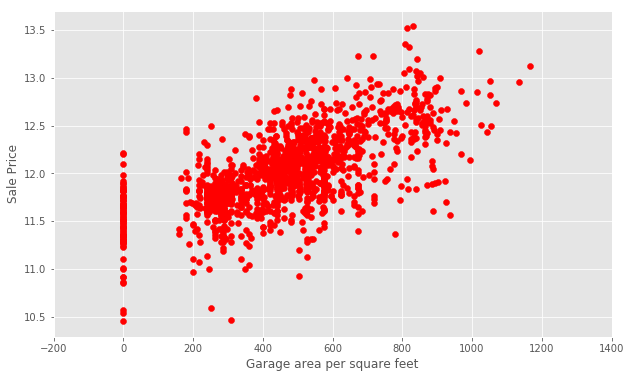

In [29]:
plt.scatter(x=train['GarageArea'],y=np.log(train['SalePrice']),color='red')
plt.xlim(-200,1400)
plt.xlabel('Garage area per square feet')
plt.ylabel('Sale Price')
plt.show()

In [34]:
#Handling null values
nulls = pd.DataFrame(train.isnull().sum().sort_values(ascending=False)[:25])
nulls.columns = ['Null Count']
nulls.index.name = 'Feature'
nulls

,Null Count
Feature,
PoolQC,1449
MiscFeature,1402
Alley,1364
Fence,1174
FireplaceQu,689
LotFrontage,258
GarageCond,81
GarageType,81
GarageYrBlt,81


In [35]:
print("Unique values in Misc are: ", train.MiscFeature.unique())

Unique values in Misc are:  [nan 'Shed' 'Gar2' 'Othr' 'TenC']


In [37]:
#checking non-numeric features
categoricals = train.select_dtypes(exclude=[np.number])
categoricals.describe()

,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,...,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
count,1455,1455,91,1455,1455,1455,1455,1455,1455,1455,...,1374,1374,1374,1374,1455,6,281,53,1455,1455
unique,5,2,2,4,4,2,5,3,25,9,...,6,3,5,5,3,3,4,4,9,6
top,RL,Pave,Grvl,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,...,Attchd,Unf,TA,TA,Y,Gd,MnPrv,Shed,WD,Normal
freq,1147,1450,50,921,1309,1454,1048,1378,225,1257,...,867,605,1306,1321,1335,2,157,48,1266,1196


In [38]:
#Transforming features
print("Original: \n")
print(train.Street.value_counts())

Original: 

Pave    1450
Grvl       5
Name: Street, dtype: int64


In [39]:
train['enc_street']=pd.get_dummies(train.Street, drop_first=True)
test['enc_street']=pd.get_dummies(test.Street, drop_first=True)

In [40]:
print("Encoded: \n")
print(train.enc_street.value_counts())

Encoded: 

1    1450
0       5
Name: enc_street, dtype: int64


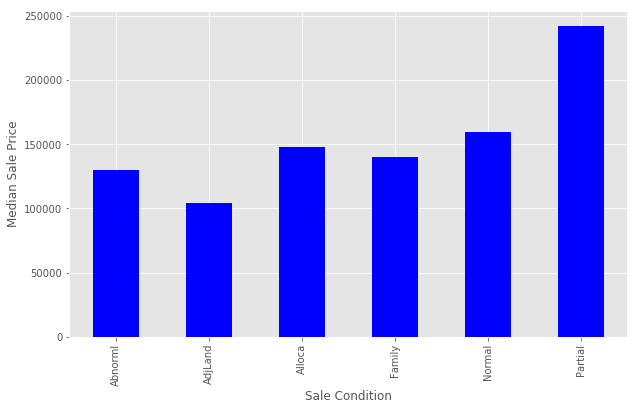

In [45]:
condition_pivot = train.pivot_table(index='SaleCondition',
                              values='SalePrice', aggfunc=np.median)
condition_pivot.plot(kind='bar',color='blue')
plt.xlabel("Sale Condition")
plt.ylabel("Median Sale Price")
plt.show()

In [48]:
def encode(x):
    if x == 'Partial':
        return 1
    else :
        return 0
train['enc_condition'] = train.SaleCondition.apply(encode)
test['enc_condition'] = test.SaleCondition.apply(encode)

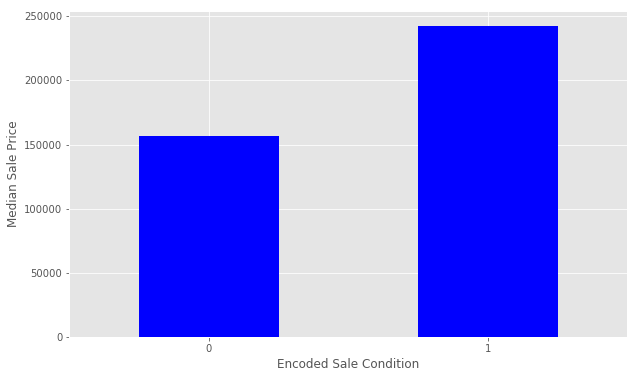

In [51]:
condition_pivot = train.pivot_table(index='enc_condition',
                              values='SalePrice', aggfunc=np.median)
condition_pivot.plot(kind='bar',color='blue')
plt.xlabel("Encoded Sale Condition")
plt.ylabel("Median Sale Price")
plt.xticks(rotation=0)
plt.show()

In [52]:
data = train.select_dtypes(include=[np.number]).interpolate().dropna()

In [57]:
sum(data.isnull().sum()!=0)

0

In [59]:
#builiding the model
y = np.log(train.SalePrice)
X = data.drop(['SalePrice','Id'],axis=1)

In [60]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,random_state=42,test_size=.33)

In [63]:
#linear regression model
from sklearn import linear_model
lr = linear_model.LinearRegression()

In [64]:
model = lr.fit(X_train,y_train)

In [65]:
print("R-squared value is :\n ",model.score(X_test,y_test))

R-squared value is :
  0.888247770926


In [66]:
predictions = model.predict(X_test)

In [69]:
print(predictions[:10])

[ 11.91390437  12.04903047  11.77351971  11.79183754  11.26944723
  11.36259336  12.3362407   11.70692621  12.02044888  11.89282643]


In [70]:
print(y_test[:10])

497     12.122691
1265    12.122147
411     11.884489
1048    11.652687
1035    11.338572
614     11.231888
218     12.649155
1185    11.560763
1195    12.078239
887     11.816727
Name: SalePrice, dtype: float64


In [71]:
from sklearn.metrics import mean_squared_error
print("RMSE is: \n",mean_squared_error(y_test,predictions))

RMSE is: 
 0.0178417945196


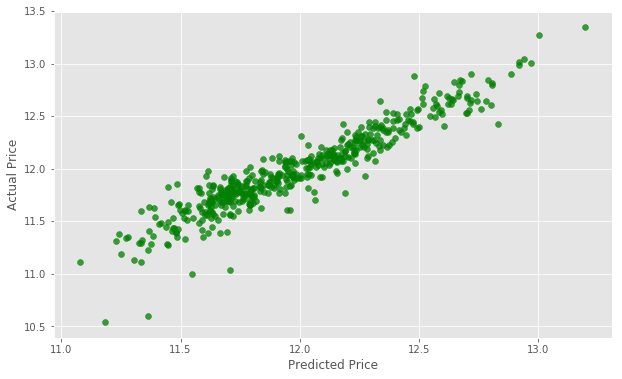

In [77]:
actual_values = y_test
plt.scatter(predictions,actual_values,color='g',alpha=.75)
plt.xlabel("Predicted Price")
plt.ylabel("Actual Price")
plt.show()

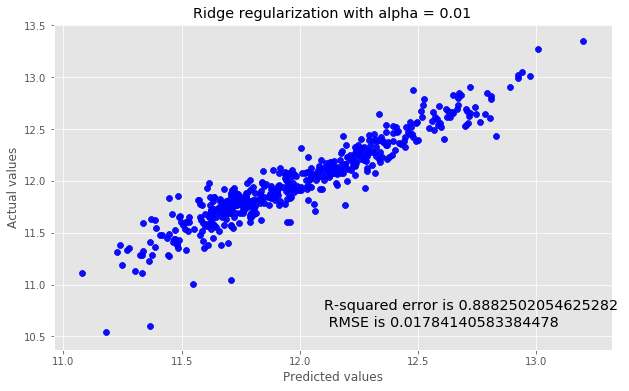

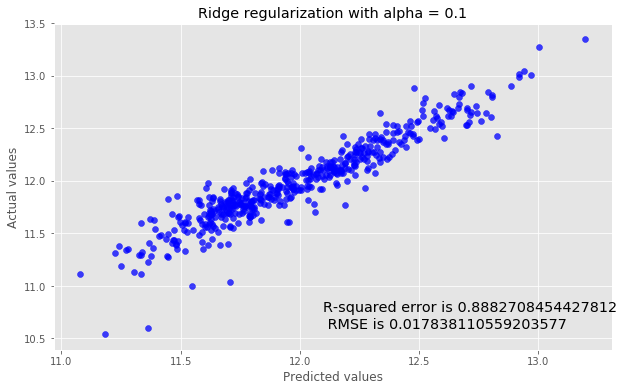

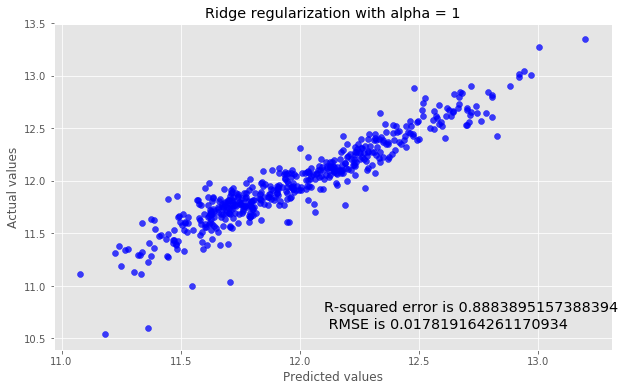

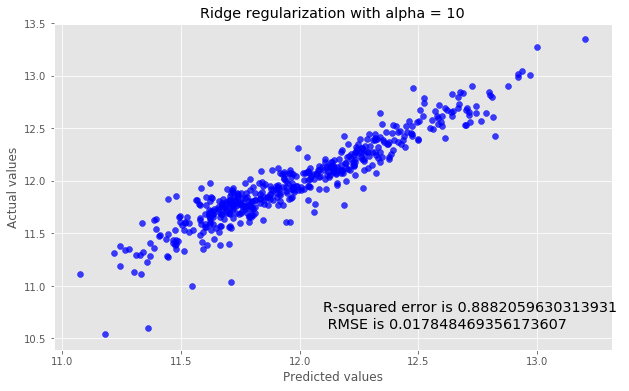

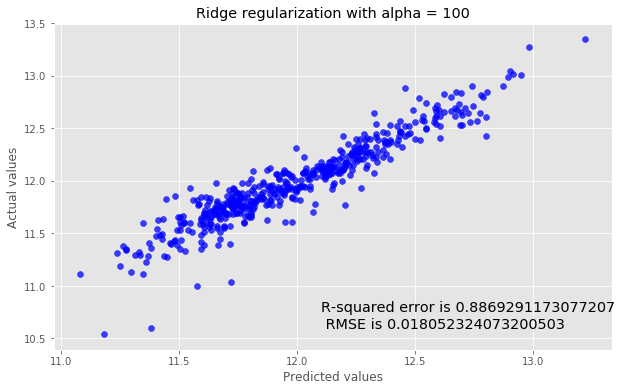

In [80]:
#ridge regularization
for i in range(-2,3):
    alpha = 10**i
    rm = linear_model.Ridge(alpha=alpha)
    ridge_model = rm.fit(X_train,y_train)
    rm_predictions = ridge_model.predict(X_test)
    
    plt.scatter(rm_predictions, actual_values, color='b', alpha = .75)
    plt.xlabel("Predicted values")
    plt.ylabel("Actual values")
    plt.title("Ridge regularization with alpha = {}".format(alpha))
    overlay = 'R-squared error is {} \n RMSE is {}'.format(ridge_model.score(X_test,y_test),
                                            mean_squared_error(y_test,rm_predictions))
    plt.annotate(s=overlay,xy=(12.1,10.6),size = 'x-large')
    plt.show()
    

In [81]:
#final results for test data
final_results = pd.DataFrame()
final_results['Id'] = test['Id']

In [84]:
feats = test.select_dtypes(include=[np.number]).drop(['Id'],axis=1).interpolate()

In [85]:
log_predictions = model.predict(feats)

In [86]:
final_predictions = np.exp(log_predictions)

In [87]:
final_results["SalePrice"] = final_predictions
final_results.head()

,Id,SalePrice
0,1461,128959.491726
1,1462,122920.740244
2,1463,175704.825981
3,1464,200050.832638
4,1465,182075.469864


In [88]:
final_results.to_csv("Final_results", index = False)